# Data Pre-Processing

<b> In this document, we will try to adapt the data we have to the machine learning model by using various data sets.

In [3]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<b> Overview of the Titanic Dataset

In [4]:
from EDA import check_df

check_df(df)

##################### Shape #####################
(891, 15)
##################### Types #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##################### Head #####################
##################### Tail #####################
     survived  pclass     sex   age  sibsp  parch   fare embarked   class    who  adult_male deck  embark_town alive  alone
886         0       2    male  27.0      0      0  13.00        S  Second    man        True  NaN  Southampton    no   True
887         1       1  female  19.0      0      0  30.00        S   First  woman       False    B  Southampton   yes   True
888         0       3  female   NaN      1    

# Analysis of Categorical Variables

In [5]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [6]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [7]:
df["class"].nunique()

3

In [8]:
from EDA import *
cat_summary(df,'sex')

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


<b> Let's find out what are categorical variables

In [9]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols

Observations: 891
Variables: 15
cat_cols: 9
num_cols: 2
cat_but_car: 0
num_but_cat: 0


['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [10]:
# Numerical columns

num_cols

['age', 'fare']

In [11]:
# Categorical but High cardinality columns

cat_but_car

[]

In [12]:
# Summary for categorical variables
from EDA import cat_summary

for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#################################

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


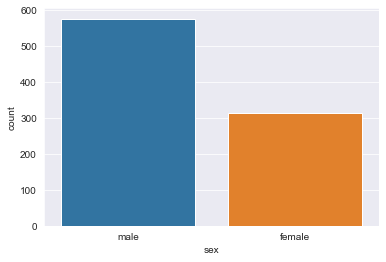

In [13]:
cat_summary(df, "sex", plot=True)

# Analysis of Numerical Variables

In [15]:
num_summary(df, "age")

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


<b> Summary information for all numeric variables

In [16]:
for col in num_cols:
    num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


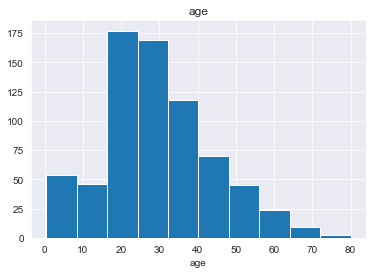

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


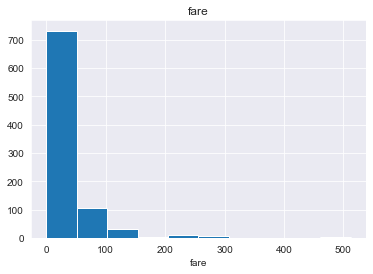

In [17]:
for col in num_cols:
    num_summary(df, col, plot=True)

# Analysis of Target Variable

In [18]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


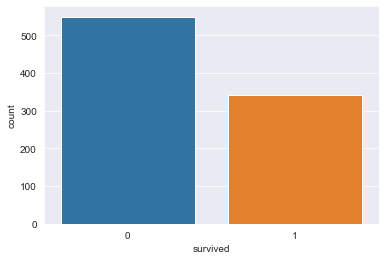

In [19]:
cat_summary(df, "survived", plot=True)

# Analysis of the Target Variable with Categorical Variables

In [20]:
from EDA import target_summary_with_cat

target_summary_with_cat(df, "survived", "pclass")

        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363




In [21]:
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957


        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363


       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458


            TARGET_MEAN
adult_male             
0              0.717514
1              0.163873


      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000


             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957


       TARGET_MEAN
alive             
no             0.0
yes            1.0


       TARGET_MEAN
alone             
0         0.505650
1         0.303538




# Analysis of Target Variable with Numerical Variables

In [22]:
from EDA import target_summary_with_num

for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408




# Analysis of Correlation

In [23]:
from EDA import high_corr_cols

df = pd.read_csv("breast_cancer.csv")
df = df.iloc[:, 1:-1]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 569
Variables: 31
cat_cols: 1
num_cols: 30
cat_but_car: 0
num_but_cat: 0


In [25]:
corr = df[num_cols].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


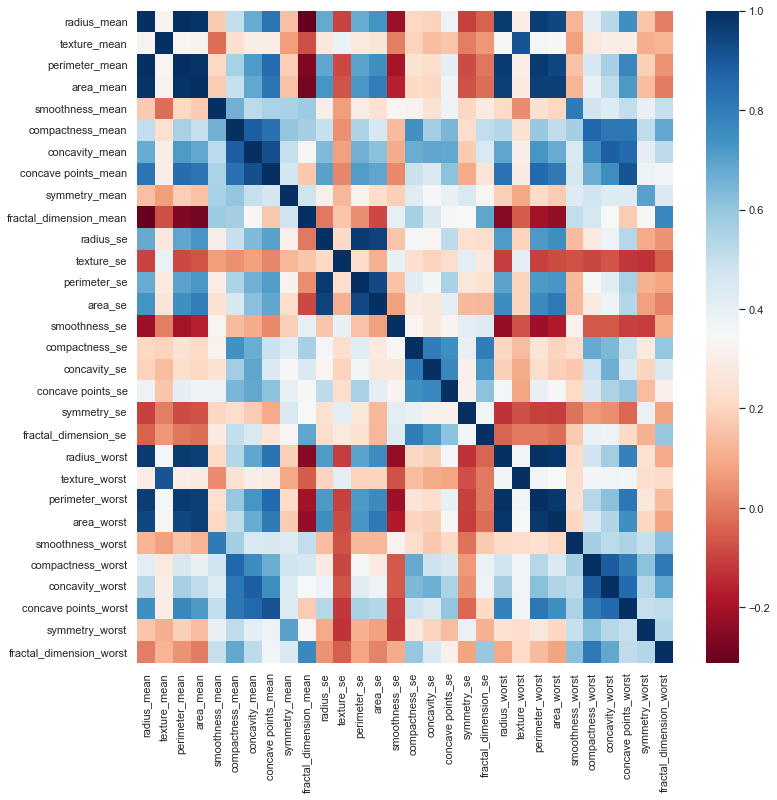

In [26]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

# Deleting Highly Correlation Variables

In [28]:
high_corr_cols(df)

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

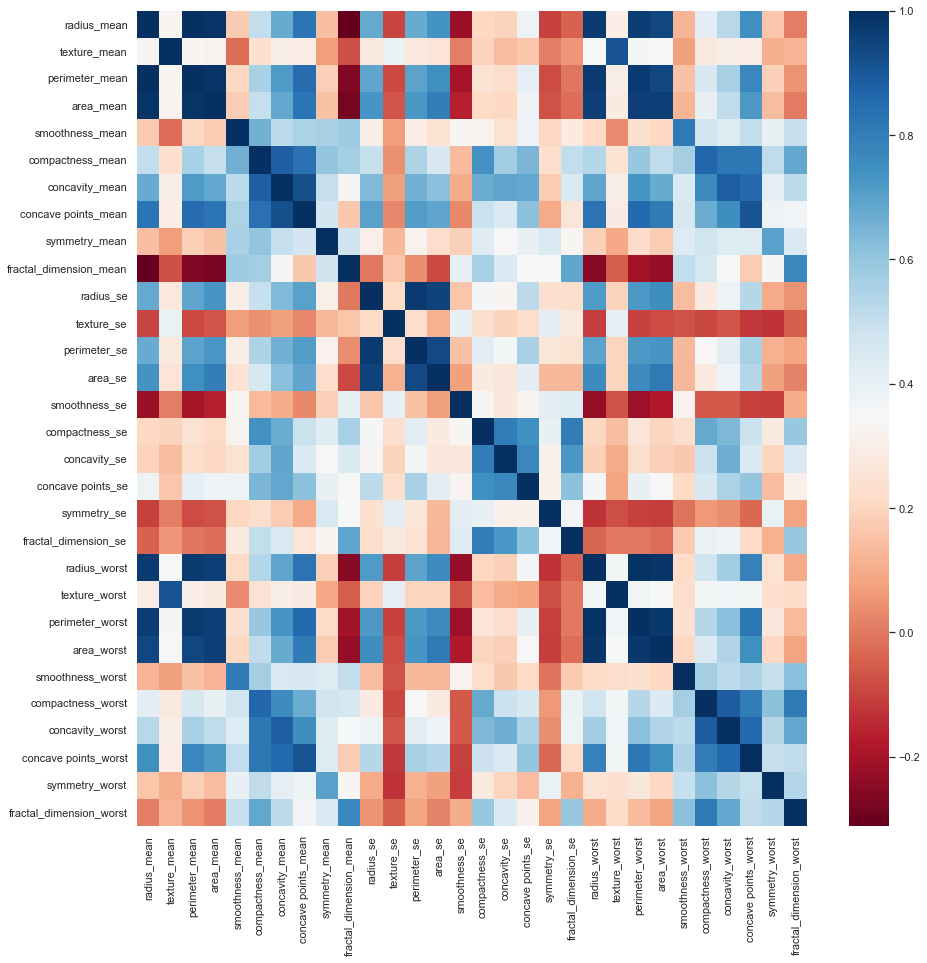

In [29]:
drop_list = high_corr_cols(df, plot=True)

In [30]:
df.drop(drop_list, axis=1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


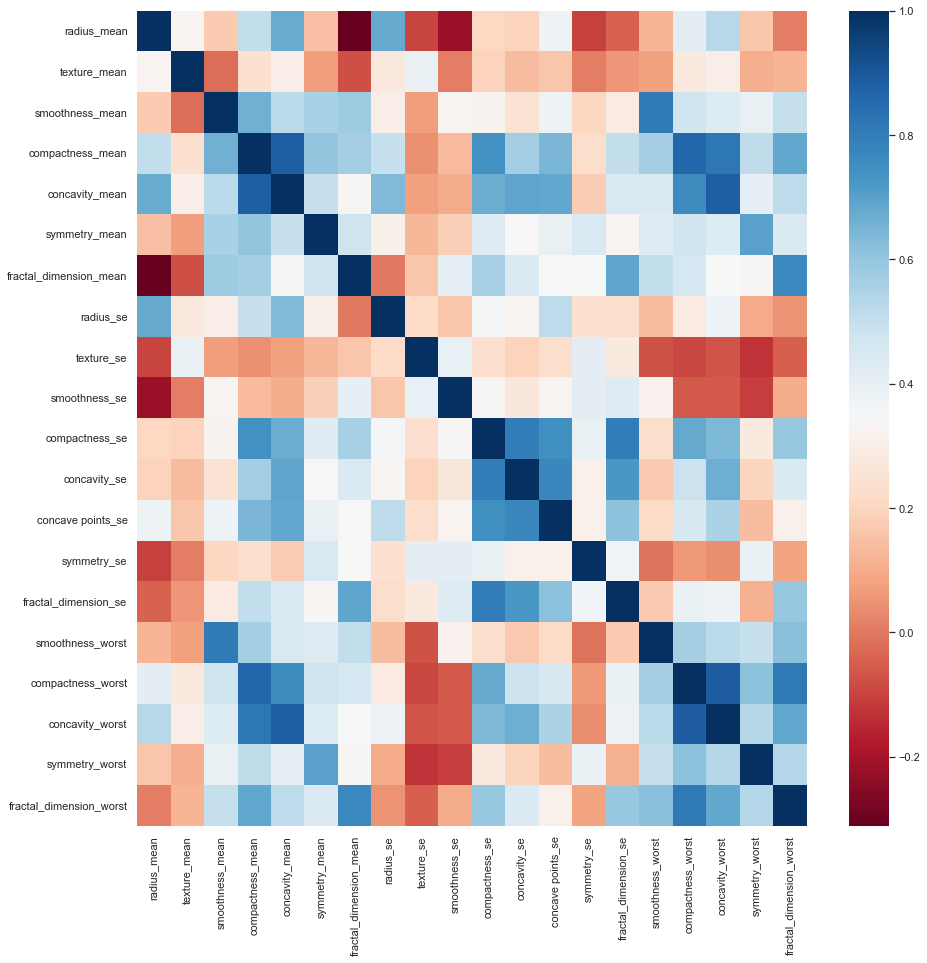

[]

In [31]:
high_corr_cols(df.drop(drop_list, axis=1), plot=True)

# How to Catch Outliers?

In [32]:
from PreProcessing import outlier_thresholds

df = sns.load_dataset('titanic')

In [33]:
outlier_thresholds(df, "age")

(-6.6875, 64.8125)

In [34]:
outlier_thresholds(df, "fare")

(-26.724, 65.6344)

In [35]:
low, up = outlier_thresholds(df, "fare")
low, up

(-26.724, 65.6344)

# Is there any outlier value?

In [37]:
from PreProcessing import check_outlier

check_outlier(df, "age")

True

In [38]:
check_outlier(df, "fare")

True

In [39]:
df = pd.read_csv('application_train.csv')

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
cat_cols: 19
num_cols: 61
cat_but_car: 1
num_but_cat: 4


In [40]:
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]
num_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [41]:
for col in num_cols:
    print(col, check_outlier(df, col))

AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_REGISTRATION True
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI True
YEARS_BEGINEXPLUATATION_MEDI True
YEARS_BUILD_MEDI True
COMMONAREA_MEDI True
ELEVATORS_MEDI True
ENT

# Accessing Outliers

In [42]:
from PreProcessing import grab_outliers

df = sns.load_dataset('titanic')
grab_outliers(df,'age')

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  who  adult_male deck  embark_town alive  alone
33          0       2  male  66.0      0      0  10.5000        S  Second  man        True  NaN  Southampton    no   True
54          0       1  male  65.0      0      1  61.9792        C   First  man        True    B    Cherbourg    no  False
96          0       1  male  71.0      0      0  34.6542        C   First  man        True    A    Cherbourg    no   True
116         0       3  male  70.5      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True
280         0       3  male  65.0      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True


In [43]:
grab_outliers(df, "age", True)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  who  adult_male deck  embark_town alive  alone
33          0       2  male  66.0      0      0  10.5000        S  Second  man        True  NaN  Southampton    no   True
54          0       1  male  65.0      0      1  61.9792        C   First  man        True    B    Cherbourg    no  False
96          0       1  male  71.0      0      0  34.6542        C   First  man        True    A    Cherbourg    no   True
116         0       3  male  70.5      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True
280         0       3  male  65.0      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [44]:
age_index = grab_outliers(df, "age", True)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  who  adult_male deck  embark_town alive  alone
33          0       2  male  66.0      0      0  10.5000        S  Second  man        True  NaN  Southampton    no   True
54          0       1  male  65.0      0      1  61.9792        C   First  man        True    B    Cherbourg    no  False
96          0       1  male  71.0      0      0  34.6542        C   First  man        True    A    Cherbourg    no   True
116         0       3  male  70.5      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True
280         0       3  male  65.0      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True


In [45]:
outlier_thresholds(df, "age")

(-6.6875, 64.8125)

In [47]:
check_outlier(df, "age")

True

In [48]:
grab_outliers(df, "age", True)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  who  adult_male deck  embark_town alive  alone
33          0       2  male  66.0      0      0  10.5000        S  Second  man        True  NaN  Southampton    no   True
54          0       1  male  65.0      0      1  61.9792        C   First  man        True    B    Cherbourg    no  False
96          0       1  male  71.0      0      0  34.6542        C   First  man        True    A    Cherbourg    no   True
116         0       3  male  70.5      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True
280         0       3  male  65.0      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

# Solving the Outlier Problem

<b> 1) Deletion

In [49]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 9
num_cols: 2
cat_but_car: 0
num_but_cat: 0


In [50]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [51]:
df.shape

(891, 15)

In [52]:
from PreProcessing import remove_outlier

for col in num_cols:
    new_df = remove_outlier(df, col)

In [53]:
df.shape[0] - new_df.shape[0]

116

<b>2) re-assignment with thresholds

In [54]:
low, up = outlier_thresholds(df, "fare")
low, up

(-26.724, 65.6344)

In [55]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [56]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 9
num_cols: 2
cat_but_car: 0
num_but_cat: 0


In [57]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [60]:
from PreProcessing import replace_with_thresholds

for col in num_cols:
    print(col, check_outlier(df, col))

age True
fare True


In [61]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [62]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
fare False


# Solving the Missing Value Problem

In [63]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

<b>1) Deletion

In [64]:
df.dropna().shape

(182, 15)

<b>2) Filling with Simple Assignment Methods

In [65]:
df = sns.load_dataset('titanic')
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [67]:
df['age'] = df["age"].fillna(df["age"].mean())
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [68]:
df = sns.load_dataset('titanic')
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [69]:
df["age"].fillna(df["age"].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [70]:
df = sns.load_dataset('titanic')

cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

Observations: 891
Variables: 15
cat_cols: 9
num_cols: 2
cat_but_car: 0
num_but_cat: 0


In [71]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [72]:
df.loc[:, num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()), axis=0)
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [73]:
df["embarked"].isnull().sum()

2

In [74]:
df['embarked'] = df["embarked"].fillna(df["embarked"].mode()[0])

In [75]:
df["embarked"].isnull().sum()

0

# Examining the Relationship of Missing Values with the Dependent Variable

In [76]:
from PreProcessing import missing_values_table

df = sns.load_dataset('titanic')

missing_values_table(df, True)

             n_miss  ratio
deck            688  77.22
age             177  19.87
embarked          2   0.22
embark_town       2   0.22


['age', 'embarked', 'deck', 'embark_town']

In [77]:
na_cols = missing_values_table(df, True)

             n_miss  ratio
deck            688  77.22
age             177  19.87
embarked          2   0.22
embark_town       2   0.22


In [78]:
from PreProcessing import missing_vs_target

missing_vs_target(df, "survived", na_cols)

             TARGET_MEAN  Count
age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


                  TARGET_MEAN  Count
embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2


              TARGET_MEAN  Count
deck_NA_FLAG                    
0                0.669951    203
1                0.299419    688


                     TARGET_MEAN  Count
embark_town_NA_FLAG                    
0                       0.382452    889
1                       1.000000      2




# Label Encoding & Binary Encoding

In [79]:
df = sns.load_dataset('titanic')

df["sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [80]:
from PreProcessing import label_encoder

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)

df.sex.head()

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int32

# One-Hot Encoding

In [81]:
from PreProcessing import one_hot_encoder

df = sns.load_dataset('titanic')
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [82]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['pclass', 'sibsp', 'parch', 'embarked', 'class', 'who', 'deck', 'embark_town']

In [83]:
one_hot_encoder(df, ohe_cols).head()

,survived,sex,age,fare,adult_male,alive,alone,pclass_2,pclass_3,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,0,male,22.0,7.2500,True,no,False,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,71.2833,False,yes,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,1,female,26.0,7.9250,False,yes,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,1,female,35.0,53.1000,False,yes,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4,0,male,35.0,8.0500,True,no,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1


# Rare Encoding

In [84]:
from PreProcessing import rare_encoder,rare_analyser

df = pd.read_csv('application_train.csv')
df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [85]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
cat_cols: 19
num_cols: 61
cat_but_car: 1
num_but_cat: 4


In [86]:
for col in cat_cols:
    cat_summary(df, col)

                 NAME_CONTRACT_TYPE      Ratio
Cash loans                   278232  90.478715
Revolving loans               29279   9.521285
##########################################
     CODE_GENDER      Ratio
F         202448  65.834393
M         105059  34.164306
XNA            4   0.001301
##########################################
   FLAG_OWN_CAR      Ratio
N        202924  65.989184
Y        104587  34.010816
##########################################
   FLAG_OWN_REALTY      Ratio
Y           213312  69.367275
N            94199  30.632725
##########################################
                 NAME_TYPE_SUITE      Ratio
Unaccompanied             248526  80.818572
Family                     40149  13.056118
Spouse, partner            11370   3.697429
Children                    3267   1.062401
Other_B                     1770   0.575589
Other_A                      866   0.281616
Group of people              271   0.088127
##########################################
         

In [87]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [88]:
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean()

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64

In [89]:
rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT     RATIO  TARGET_MEAN
Cash loans       278232  0.904787     0.083459
Revolving loans   29279  0.095213     0.054783


CODE_GENDER : 3
      COUNT     RATIO  TARGET_MEAN
F    202448  0.658344     0.069993
M    105059  0.341643     0.101419
XNA       4  0.000013     0.000000


FLAG_OWN_CAR : 2
    COUNT     RATIO  TARGET_MEAN
N  202924  0.659892     0.085002
Y  104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
    COUNT     RATIO  TARGET_MEAN
N   94199  0.306327     0.083249
Y  213312  0.693673     0.079616


NAME_TYPE_SUITE : 7
                  COUNT     RATIO  TARGET_MEAN
Children           3267  0.010624     0.073768
Family            40149  0.130561     0.074946
Group of people     271  0.000881     0.084871
Other_A             866  0.002816     0.087760
Other_B            1770  0.005756     0.098305
Spouse, partner   11370  0.036974     0.078716
Unaccompanied    248526  0.808186     0.081830


NAME_INCOME_TYPE : 8
                  

In [90]:
new_df = rare_encoder(df, 0.01)

In [91]:
rare_analyser(new_df, "TARGET", cat_cols )

NAME_CONTRACT_TYPE : 2
                  COUNT     RATIO  TARGET_MEAN
Cash loans       278232  0.904787     0.083459
Revolving loans   29279  0.095213     0.054783


CODE_GENDER : 3
       COUNT     RATIO  TARGET_MEAN
F     202448  0.658344     0.069993
M     105059  0.341643     0.101419
Rare       4  0.000013     0.000000


FLAG_OWN_CAR : 2
    COUNT     RATIO  TARGET_MEAN
N  202924  0.659892     0.085002
Y  104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
    COUNT     RATIO  TARGET_MEAN
N   94199  0.306327     0.083249
Y  213312  0.693673     0.079616


NAME_TYPE_SUITE : 5
                  COUNT     RATIO  TARGET_MEAN
Children           3267  0.010624     0.073768
Family            40149  0.130561     0.074946
Rare               2907  0.009453     0.093911
Spouse, partner   11370  0.036974     0.078716
Unaccompanied    248526  0.808186     0.081830


NAME_INCOME_TYPE : 5
                       COUNT     RATIO  TARGET_MEAN
Commercial associate   71617  0.232892     0.074843
Pens